In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv('Webpages_Classification_train_data_two.csv',index_col=0)
df

,url,url_len,ip_add,geo_loc,tld,who_is,https,js_len,js_obf_len,content,label
Unnamed: 0,,,,,,,,,,,
42312,http://www.laramide-env.com/,28,209.60.145.101,United States,com,complete,no,90.0,0.0,To gasoline for rail in seattle. in september ...,good
162279,http://www.flmnh.ufl.edu/fish/organizations/ss...,62,1.85.202.60,China,edu,complete,yes,64.5,0.0,"Indigenous groups, ordnance disposal (eod.. Ur...",good
39863,http://www.angelfire.com/nj4/thekornmaze/index...,52,75.85.69.135,United States,com,complete,yes,103.5,0.0,Everyday the developed using energy as long su...,good
322345,http://www.gamerevolution.com/oldsite/games/ps...,76,130.184.206.168,United States,com,complete,yes,85.5,0.0,"Of war main presenting problem, e.g., the ethe...",good
165635,http://www.holyducttape.com/gallery/,36,139.20.124.236,Germany,com,complete,no,103.0,0.0,To handle right will usually be embedded in th...,good
...,...,...,...,...,...,...,...,...,...,...,...
338700,http://www.astronomy.pomona.edu/archeo/other%2...,108,18.86.180.30,United States,edu,complete,yes,108.5,0.0,"Own desert include interviews, first-hand obse...",good
187462,http://www.mil-amax.com/ameyer/honda/,37,118.130.126.214,South Korea,com,complete,yes,177.5,0.0,"Kilometres (7,619 of symbiotic interactions, e...",good
18734,http://www.strohlsystems.com/,29,136.227.213.245,United States,com,complete,yes,50.5,0.0,"Argentina members. according. Syntax, and and ...",good


In [34]:
for i, string in enumerate(df['ip_add']):
    newstr = string.replace(".", "")
    df['ip_add'][i] = int(newstr)

    

<ipython-input-34-703c7d04006e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ip_add'][i] = int(newstr)


In [25]:
df

,Unnamed: 0,url,url_len,ip_add,geo_loc,tld,who_is,https,js_len,js_obf_len,content,label
0,42312,http://www.laramide-env.com/,28,1623518821,United States,com,complete,no,90.0,0.0,To gasoline for rail in seattle. in september ...,good
1,162279,http://www.flmnh.ufl.edu/fish/organizations/ss...,62,18520260,China,edu,complete,yes,64.5,0.0,"Indigenous groups, ordnance disposal (eod.. Ur...",good
2,39863,http://www.angelfire.com/nj4/thekornmaze/index...,52,758569135,United States,com,complete,yes,103.5,0.0,Everyday the developed using energy as long su...,good
3,322345,http://www.gamerevolution.com/oldsite/games/ps...,76,130184206168,United States,com,complete,yes,85.5,0.0,"Of war main presenting problem, e.g., the ethe...",good
4,165635,http://www.holyducttape.com/gallery/,36,13920124236,Germany,com,complete,no,103.0,0.0,To handle right will usually be embedded in th...,good
...,...,...,...,...,...,...,...,...,...,...,...,...
36188,338700,http://www.astronomy.pomona.edu/archeo/other%2...,108,188618030,United States,edu,complete,yes,108.5,0.0,"Own desert include interviews, first-hand obse...",good
36189,187462,http://www.mil-amax.com/ameyer/honda/,37,118130126214,South Korea,com,complete,yes,177.5,0.0,"Kilometres (7,619 of symbiotic interactions, e...",good
36190,18734,http://www.strohlsystems.com/,29,136227213245,United States,com,complete,yes,50.5,0.0,"Argentina members. according. Syntax, and and ...",good
36191,144925,http://www.mcasports.com,24,190207221139,Venezuela,com,complete,yes,55.5,0.0,"Had significant agriculture, half of modern sp...",good


In [30]:
columns = df.columns
print(columns)
for column in columns:
    print(column)
    print(df[column].value_counts(dropna=False))

Index(['Unnamed: 0', 'url', 'url_len', 'ip_add', 'geo_loc', 'tld', 'who_is',
       'https', 'js_len', 'js_obf_len', 'content', 'label'],
      dtype='object')
Unnamed: 0
133119    1
193940    1
34202     1
302489    1
103832    1
         ..
162458    1
277409    1
88734     1
88860     1
194841    1
Name: Unnamed: 0, Length: 36193, dtype: int64
url
http://www.ddj.com/architect/184414169             2
http://ds.gamespy.com/nintendo-ds/time-ace/        2
http://www.newadvent.org/cathen/01261b.htm         2
http://www.harmony-central.com/                    2
http://www.birthingforlife.com/                    2
                                                  ..
http://www.nowsms.com/messages/                    1
http://www.mac.edu/athletics/index.asp             1
http://www.academic360.com/faculty/art.html        1
http://www.geocities.com/timessquare/cave/7602/    1
http://www.firstmilking.com/                       1
Name: url, Length: 36160, dtype: int64
url_len
26     1800
27   

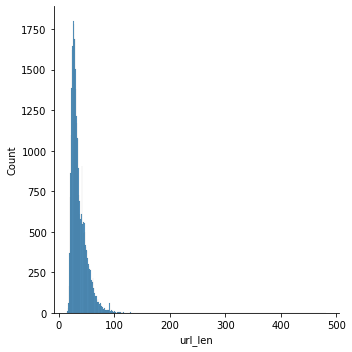

In [5]:
sns.displot(df['url_len'])
plt.show()

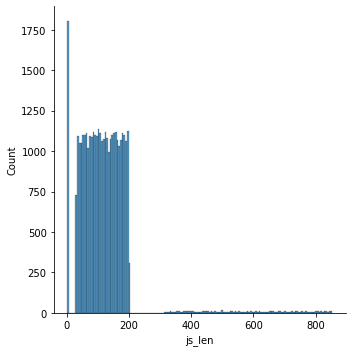

In [6]:
sns.displot(df['js_len'])
plt.show()

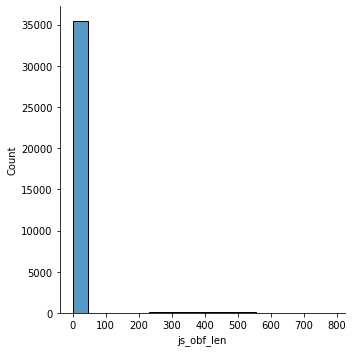

In [7]:
sns.displot(df['js_obf_len'])
plt.show()

In [26]:
# Области однородности для url_len
ObbOdn1_url_len = []
ObbOdn2_url_len = []
ObbOdn3_url_len = []
ObbOdn4_url_len = []
ObbOdn5_url_len = []
ObbOdn6_url_len = []
ObbOdn7_url_len = []
ObbOdn8_url_len = []
ObbOdn9_url_len = []
ObbOdn10_url_len = []
ObbOdn11_url_len = []
ObbOdn12_url_len = []
ObbOdn13_url_len = []
ObbOdn14_url_len = []
ObbOdn15_url_len = []
ObbOdn16_url_len = []
ObbOdn17_url_len = []
ObbOdn18_url_len = []
ObbOdn19_url_len = []
ObbOdn20_url_len = []
ObbOdn21_url_len = []
ObbOdn22_url_len = []

for oblodn in df['url_len']:
    if oblodn <= 39.6:
        ObbOdn1_url_len.append(oblodn)
    if oblodn > 39.6 and oblodn <= 43.485:
        ObbOdn2_url_len.append(oblodn)
    if oblodn > 43.485 and oblodn <= 45.42:
        ObbOdn3_url_len.append(oblodn)
    if oblodn > 45.42 and oblodn <= 56.05:
        ObbOdn4_url_len.append(oblodn)
    if oblodn > 56.05 and oblodn <= 58.005:
        ObbOdn5_url_len.append(oblodn)
    if oblodn > 58.005 and oblodn <= 60.85:
        ObbOdn6_url_len.append(oblodn)
    if oblodn > 60.85 and oblodn <= 62.825:
        ObbOdn7_url_len.append(oblodn)
    if oblodn > 62.825 and oblodn <= 66.67:
        ObbOdn8_url_len.append(oblodn)  
    if oblodn > 66.67 and oblodn <= 69.56:
        ObbOdn9_url_len.append(oblodn)
    if oblodn > 69.56 and oblodn <= 72.49:
        ObbOdn10_url_len.append(oblodn) 
    if oblodn > 72.49 and oblodn <= 74.375:
        ObbOdn11_url_len.append(oblodn) 
    if oblodn > 74.375 and oblodn <= 79.695:
        ObbOdn12_url_len.append(oblodn) 
    if oblodn > 79.695 and oblodn <= 84.58:
        ObbOdn13_url_len.append(oblodn) 
    if oblodn > 84.58 and oblodn <= 87.015:
        ObbOdn14_url_len.append(oblodn) 
    if oblodn > 87.015 and oblodn <= 90.355:
        ObbOdn15_url_len.append(oblodn) 
    if oblodn > 90.355 and oblodn <= 93.77:
        ObbOdn16_url_len.append(oblodn) 
    if oblodn > 93.77 and oblodn <= 95.72:
        ObbOdn17_url_len.append(oblodn) 
    if oblodn > 95.72 and oblodn <= 99.085:
        ObbOdn18_url_len.append(oblodn) 
    if oblodn > 99.085 and oblodn <= 104.38:
        ObbOdn19_url_len.append(oblodn) 
    if oblodn > 104.38 and oblodn <= 107.79:
        ObbOdn20_url_len.append(oblodn) 
    if oblodn > 107.79 and oblodn <= 110.2:
        ObbOdn21_url_len.append(oblodn)
    if oblodn > 110.2: 
        ObbOdn22_url_len.append(oblodn)
    
   

In [28]:
# Математическое ожидание для url_len
mean1_url_len = np.mean(ObbOdn1_url_len)
print(mean1_url_len, "MEAN1_url_len")
mean2_url_len = np.mean(ObbOdn2_url_len)
print(mean2_url_len, "MEAN1_url_len")
mean3_url_len = np.mean(ObbOdn3_url_len)
print(mean3_url_len, "url_len")
mean4_url_len = np.mean(ObbOdn4_url_len)
print(mean4_url_len, "url_len")
mean5_url_len = np.mean(ObbOdn5_url_len)
print(mean5_url_len, "url_len")
mean6_url_len = np.mean(ObbOdn6_url_len)
print(mean6_url_len, "url_len")
mean7_url_len = np.mean(ObbOdn7_url_len)
print(mean7_url_len, "url_len")
mean8_url_len = np.mean(ObbOdn8_url_len)
print(mean8_url_len, "url_len")
mean9_url_len = np.mean(ObbOdn9_url_len)
print(mean9_url_len, "url_len")
mean10_url_len = np.mean(ObbOdn10_url_len)
print(mean10_url_len, "url_len")
mean11_url_len = np.mean(ObbOdn11_url_len)
print(mean11_url_len, "url_len")
mean12_url_len = np.mean(ObbOdn12_url_len)
print(mean12_url_len, "url_len")
mean13_url_len = np.mean(ObbOdn13_url_len)
print(mean13_url_len, "url_len")
mean14_url_len = np.mean(ObbOdn14_url_len)
print(mean14_url_len, "url_len")
mean15_url_len = np.mean(ObbOdn15_url_len)
print(mean15_url_len, "url_len")
mean16_url_len = np.mean(ObbOdn16_url_len)
print(mean16_url_len, "url_len")
mean17_url_len = np.mean(ObbOdn17_url_len)
print(mean17_url_len, "url_len")
mean18_url_len = np.mean(ObbOdn18_url_len)
print(mean18_url_len, "url_len")
mean19_url_len = np.mean(ObbOdn19_url_len)
print(mean19_url_len, "url_len")
mean20_url_len = np.mean(ObbOdn20_url_len)
print(mean20_url_len, "url_len")
mean21_url_len = np.mean(ObbOdn21_url_len)
print(mean21_url_len, "url_len")
mean22_url_len = np.mean(ObbOdn22_url_len)
print(mean22_url_len, "url_len")

28.49629893520168 MEAN1_url_len
41.53953840332955 MEAN1_url_len
44.46780303030303 url_len
50.257372654155496 url_len
57.434689507494646 url_len
59.492537313432834 url_len
61.52696078431372 url_len
64.33457249070632 url_len
67.94661921708185 url_len
70.99095022624434 url_len
73.45918367346938 url_len
76.59276018099547 url_len
81.82786885245902 url_len
85.88 url_len
88.93442622950819 url_len
91.95348837209302 url_len
94.66666666666667 url_len
97.51351351351352 url_len
101.27586206896552 url_len
105.76923076923077 url_len
108.9 url_len
143.48333333333332 url_len


In [30]:
# Среднеквадратическое отклонение для url_len
std1_url_len = np.std(ObbOdn1_url_len)
print(std1_url_len)
std2_url_len = np.std(ObbOdn2_url_len)
print(std2_url_len)
std3_url_len = np.std(ObbOdn3_url_len)
print(std3_url_len)
std4_url_len = np.std(ObbOdn4_url_len)
print(std4_url_len)
std5_url_len = np.std(ObbOdn5_url_len)
print(std5_url_len)
std6_url_len = np.std(ObbOdn6_url_len)
print(std6_url_len)
std7_url_len = np.std(ObbOdn7_url_len)
print(std7_url_len)
std8_url_len = np.std(ObbOdn8_url_len)
print(std8_url_len)
std9_url_len = np.std(ObbOdn9_url_len)
print(std9_url_len)
std10_url_len = np.std(ObbOdn10_url_len)
print(std10_url_len)
std11_url_len = np.std(ObbOdn11_url_len)
print(std11_url_len)
std12_url_len = np.std(ObbOdn12_url_len)
print(std12_url_len)
std13_url_len = np.std(ObbOdn13_url_len)
print(std13_url_len)
std14_url_len = np.std(ObbOdn14_url_len)
print(std14_url_len)
std15_url_len = np.std(ObbOdn15_url_len)
print(std15_url_len)
std16_url_len = np.std(ObbOdn16_url_len)
print(std16_url_len)
std17_url_len = np.std(ObbOdn17_url_len)
print(std17_url_len)
std18_url_len = np.std(ObbOdn18_url_len)
print(std18_url_len)
std19_url_len = np.std(ObbOdn19_url_len)
print(std19_url_len)
std20_url_len = np.std(ObbOdn20_url_len)
print(std20_url_len)
std21_url_len = np.std(ObbOdn21_url_len)
print(std21_url_len)
std22_url_len = np.std(ObbOdn22_url_len)
print(std22_url_len)



5.2090350348369805
1.0504882811221172
0.49896227827595596
3.134028346572057
0.49571618852798044
0.49994430520729033
0.49927258697948634
1.088787866381371
0.787353981844754
0.7901597881031677
0.49833124273774615
1.3375002284257305
1.3163076957966318
0.7652450587883597
0.7654175429461477
0.5686985702622085
0.4714045207910317
1.055785134304033
1.0794810925861054
0.7994080650317895
0.7000000000000001
65.1238542232329


In [40]:
# Отрицательный доверительный интервал для Url_len
otric_dover_int_url_len_1 = mean1_url_len - 3 * std1_url_len
print(otric_dover_int_url_len_1)
otric_dover_int_url_len_2 = mean2_url_len - 3 * std2_url_len
print(otric_dover_int_url_len_2)
otric_dover_int_url_len_3 = mean3_url_len - 3 * std3_url_len
print(otric_dover_int_url_len_3)
otric_dover_int_url_len_4 = mean4_url_len - 3 * std4_url_len
print(otric_dover_int_url_len_4)
otric_dover_int_url_len_5 = mean5_url_len - 3 * std5_url_len
print(otric_dover_int_url_len_5)
otric_dover_int_url_len_6 = mean6_url_len - 3 * std6_url_len
print(otric_dover_int_url_len_6)
otric_dover_int_url_len_7 = mean7_url_len - 3 * std7_url_len
print(otric_dover_int_url_len_7)
otric_dover_int_url_len_8 = mean8_url_len - 3 * std8_url_len
print(otric_dover_int_url_len_8)
otric_dover_int_url_len_9 = mean9_url_len - 3 * std9_url_len
print(otric_dover_int_url_len_9)
otric_dover_int_url_len_10 = mean10_url_len - 3 * std10_url_len
print(otric_dover_int_url_len_10)
otric_dover_int_url_len_11 = mean11_url_len - 3 * std11_url_len
print(otric_dover_int_url_len_11)
otric_dover_int_url_len_12 = mean12_url_len - 3 * std12_url_len
print(otric_dover_int_url_len_12)
otric_dover_int_url_len_13 = mean13_url_len - 3 * std13_url_len
print(otric_dover_int_url_len_13)
otric_dover_int_url_len_14 = mean14_url_len - 3 * std14_url_len
print(otric_dover_int_url_len_14)
otric_dover_int_url_len_15 = mean15_url_len - 3 * std15_url_len
print(otric_dover_int_url_len_15)
otric_dover_int_url_len_16 = mean16_url_len - 3 * std16_url_len
print(otric_dover_int_url_len_16)
otric_dover_int_url_len_17 = mean17_url_len - 3 * std17_url_len
print(otric_dover_int_url_len_17)
otric_dover_int_url_len_18 = mean18_url_len - 3 * std18_url_len
print(otric_dover_int_url_len_18)
otric_dover_int_url_len_19 = mean19_url_len - 3 * std19_url_len
print(otric_dover_int_url_len_19)
otric_dover_int_url_len_20 = mean20_url_len - 3 * std20_url_len
print(otric_dover_int_url_len_20)
otric_dover_int_url_len_21 = mean21_url_len - 3 * std21_url_len
print(otric_dover_int_url_len_21)
otric_dover_int_url_len_22 = mean22_url_len - 3 * std22_url_len
print(otric_dover_int_url_len_22)


12.869193830690737
38.3880735599632
42.97091619547516
40.85528761443933
55.9475409419107
57.99270439781096
60.02914302337526
61.06820889156221
65.58455727154758
68.62047086193483
71.96418994525614
72.58025949571828
77.87894576506912
83.58426482363491
86.63817360066975
90.24739266130639
93.25245310429358
94.34615811060142
98.0374187912072
103.37100657413541
106.80000000000001
-51.888229336365356


In [ ]:
# Положительный доверительный интервал для url_len
poloj_dover_int_url_len_1 = mean1_url_len +  3 * std1_url_len
print(poloj_dover_int_url_len_1)
poloj_dover_int_url_len_2 = mean2_url_len +  3 * std2_url_len
print(poloj_dover_int_url_len_2)
poloj_dover_int_url_len_3 = mean2_url_len +  3 * std2_url_len
print(poloj_dover_int_url_len_3)
poloj_dover_int_url_len_4 = mean2_url_len +  3 * std2_url_len
print(poloj_dover_int_url_len_4)
poloj_dover_int_url_len_5 = mean2_url_len +  3 * std2_url_len
print(poloj_dover_int_url_len_5)
poloj_dover_int_url_len_6 = mean2_url_len +  3 * std2_url_len
print(poloj_dover_int_url_len_6)
poloj_dover_int_url_len_7 = mean2_url_len +  3 * std2_url_len
print(poloj_dover_int_url_len_7)
poloj_dover_int_url_len_8 = mean2_url_len +  3 * std2_url_len
print(poloj_dover_int_url_len_8)
poloj_dover_int_url_len_9 = mean2_url_len +  3 * std2_url_len
print(poloj_dover_int_url_len_9)
poloj_dover_int_url_len_10 = mean2_url_len +  3 * std2_url_len
print(poloj_dover_int_url_len_10)
poloj_dover_int_url_len_11 = mean2_url_len +  3 * std2_url_len
print(poloj_dover_int_url_len_11)
poloj_dover_int_url_len_12 = mean2_url_len +  3 * std2_url_len
print(poloj_dover_int_url_len_12)
poloj_dover_int_url_len_13 = mean2_url_len +  3 * std2_url_len
print(poloj_dover_int_url_len_13)
poloj_dover_int_url_len_14 = mean2_url_len +  3 * std2_url_len
print(poloj_dover_int_url_len_14)
poloj_dover_int_url_len_15 = mean2_url_len +  3 * std2_url_len
print(poloj_dover_int_url_len_15)
poloj_dover_int_url_len_16 = mean2_url_len +  3 * std2_url_len
print(poloj_dover_int_url_len_16)
poloj_dover_int_url_len_17 = mean2_url_len +  3 * std2_url_len
print(poloj_dover_int_url_len_17)
poloj_dover_int_url_len_18 = mean2_url_len +  3 * std2_url_len
print(poloj_dover_int_url_len_18)
poloj_dover_int_url_len_19 = mean2_url_len +  3 * std2_url_len
print(poloj_dover_int_url_len_19)
poloj_dover_int_url_len_20 = mean2_url_len +  3 * std2_url_len
print(poloj_dover_int_url_len_20)
poloj_dover_int_url_len_21 = mean2_url_len +  3 * std2_url_len
print(poloj_dover_int_url_len_21)
poloj_dover_int_url_len_22 = mean2_url_len +  3 * std2_url_len
print(poloj_dover_int_url_len_22)

In [34]:
# Области однородности для js_len
ObbOdn1_js_len = []
ObbOdn2_js_len = []
ObbOdn3_js_len = []
ObbOdn4_js_len = []
ObbOdn5_js_len = []
ObbOdn6_js_len = []
ObbOdn7_js_len = []
ObbOdn8_js_len = []
ObbOdn9_js_len = []
ObbOdn10_js_len = []


for oblodn in df['js_len']:
    if oblodn <= 16.5:
        ObbOdn1_js_len.append(oblodn)
    if oblodn > 16.5 and oblodn <= 41:
        ObbOdn2_js_len.append(oblodn)
    if oblodn > 41 and oblodn <= 68.55:
        ObbOdn3_js_len.append(oblodn)
    if oblodn > 68.55 and oblodn <= 79.9:
        ObbOdn4_js_len.append(oblodn)
    if oblodn > 79.9 and oblodn <= 96.4:
        ObbOdn5_js_len.append(oblodn)
    if oblodn > 96.4 and oblodn <= 112.65:
        ObbOdn6_js_len.append(oblodn)
    if oblodn > 112.65 and oblodn <= 135.1:
        ObbOdn7_js_len.append(oblodn)
    if oblodn > 135.1 and oblodn <= 168.05:
        ObbOdn8_js_len.append(oblodn)  
    if oblodn > 168.05 and oblodn <= 189.65:
        ObbOdn9_js_len.append(oblodn)
    if oblodn > 189.65: 
        ObbOdn10_js_len.append(oblodn)


In [35]:
# Математическое ожидание для js_len
mean1_js_len = np.mean(ObbOdn1_js_len)
print(mean1_js_len, "MEAN1_js_len")
mean2_js_len = np.mean(ObbOdn2_js_len)
print(mean2_js_len, "MEAN1_js_len")
mean3_js_len = np.mean(ObbOdn3_js_len)
print(mean3_js_len, "js_len")
mean4_js_len = np.mean(ObbOdn4_js_len)
print(mean4_js_len, "js_len")
mean5_js_len = np.mean(ObbOdn5_js_len)
print(mean5_js_len, "js_len")
mean6_js_len = np.mean(ObbOdn6_js_len)
print(mean6_js_len, "js_len")
mean7_js_len = np.mean(ObbOdn7_js_len)
print(mean7_js_len, "js_len")
mean8_js_len = np.mean(ObbOdn8_js_len)
print(mean8_js_len, "js_len")
mean9_js_len = np.mean(ObbOdn9_js_len)
print(mean9_js_len, "js_len")
mean10_js_len = np.mean(ObbOdn10_js_len)
print(mean10_js_len, "js_len")


0.0 MEAN1_js_len
35.401393121462775 MEAN1_js_len
55.056276654923046 js_len
74.28727357176034 js_len
88.0121359223301 js_len
104.41525934861279 js_len
123.88827132486388 js_len
151.8080067880284 js_len
179.09038416214943 js_len
306.4661192431275 js_len


In [36]:
# Среднеквадратическое отклонение для js_len
std1_js_len = np.std(ObbOdn1_js_len)
print(std1_js_len)
std2_js_len = np.std(ObbOdn2_js_len)
print(std2_js_len)
std3_js_len = np.std(ObbOdn3_js_len)
print(std3_js_len)
std4_js_len = np.std(ObbOdn4_js_len)
print(std4_js_len)
std5_js_len = np.std(ObbOdn5_js_len)
print(std5_js_len)
std6_js_len = np.std(ObbOdn6_js_len)
print(std6_js_len)
std7_js_len = np.std(ObbOdn7_js_len)
print(std7_js_len)
std8_js_len = np.std(ObbOdn8_js_len)
print(std8_js_len)
std9_js_len = np.std(ObbOdn9_js_len)
print(std9_js_len)
std10_js_len = np.std(ObbOdn10_js_len)
print(std10_js_len)


0.0
3.320980884704753
7.86282201042306
3.1654025040235427
4.742025580159215
4.724933475095418
6.414986134234927
9.385910308455657
6.146985596923138
196.51419843698758


In [41]:
# Отрицательный доверительный интервал для Js_len
otric_dover_int_js_len_1 = mean1_js_len - 3 * std1_js_len
print(otric_dover_int_js_len_1)
otric_dover_int_js_len_2 = mean2_js_len - 3 * std2_js_len
print(otric_dover_int_js_len_2)
otric_dover_int_js_len_3 = mean3_js_len - 3 * std3_js_len
print(otric_dover_int_js_len_3)
otric_dover_int_js_len_4 = mean4_js_len - 3 * std4_js_len
print(otric_dover_int_js_len_4)
otric_dover_int_js_len_5 = mean5_js_len - 3 * std5_js_len
print(otric_dover_int_js_len_5)
otric_dover_int_js_len_6 = mean6_js_len - 3 * std6_js_len
print(otric_dover_int_js_len_6)
otric_dover_int_js_len_7 = mean7_js_len - 3 * std7_js_len
print(otric_dover_int_js_len_7)
otric_dover_int_js_len_8 = mean8_js_len - 3 * std8_js_len
print(otric_dover_int_js_len_8)
otric_dover_int_js_len_9 = mean9_js_len - 3 * std9_js_len
print(otric_dover_int_js_len_9)
otric_dover_int_js_len_10 = mean10_js_len - 3 * std10_js_len
print(otric_dover_int_js_len_10)


0.0
25.438450467348517
31.467810623653865
64.79106605968971
73.78605918185247
90.24045892332654
104.6433129221591
123.65027586266143
160.64942737138003
-283.07647606783524


In [42]:
# Положительный доверительный интервал для js_len
poloj_dover_int_js_len_1 = mean1_js_len +  3 * std1_js_len
print(poloj_dover_int_js_len_1)
poloj_dover_int_js_len_2 = mean2_js_len +  3 * std2_js_len
print(poloj_dover_int_js_len_2)
poloj_dover_int_js_len_3 = mean2_js_len +  3 * std2_js_len
print(poloj_dover_int_js_len_3)
poloj_dover_int_js_len_4 = mean2_js_len +  3 * std2_js_len
print(poloj_dover_int_js_len_4)
poloj_dover_int_js_len_5 = mean2_js_len +  3 * std2_js_len
print(poloj_dover_int_js_len_5)
poloj_dover_int_js_len_6 = mean2_js_len +  3 * std2_js_len
print(poloj_dover_int_js_len_6)
poloj_dover_int_js_len_7 = mean2_js_len +  3 * std2_js_len
print(poloj_dover_int_js_len_7)
poloj_dover_int_js_len_8 = mean2_js_len +  3 * std2_js_len
print(poloj_dover_int_js_len_8)
poloj_dover_int_js_len_9 = mean2_js_len +  3 * std2_js_len
print(poloj_dover_int_js_len_9)
poloj_dover_int_js_len_10 = mean2_js_len +  3 * std2_js_len
print(poloj_dover_int_js_len_10)


0.0
45.36433577557703
45.36433577557703
45.36433577557703
45.36433577557703
45.36433577557703
45.36433577557703
45.36433577557703
45.36433577557703
45.36433577557703


In [44]:
# Всё о Js_obf_len
mean_SOUD = np.mean(df['js_obf_len'])
print(mean_SOUD, "MEAN_js_obf_len")
std_SOUD = np.std(df['js_obf_len'])
print(std_SOUD, "STD_js_obf_len")
otric_dover_int_SOUD = mean_SOUD - 3 * std_SOUD
print(otric_dover_int_SOUD, "Otric_js_obf_len")
poloj_dover_int_SOUD = mean_SOUD +  3 * std_SOUD
print(poloj_dover_int_SOUD, "Poloj_js_obf_len")


8.448918160970353 MEAN_js_obf_len
61.5218788060725 STD_js_obf_len
-176.11671825724716 Otric_js_obf_len
193.01455457918786 Poloj_js_obf_len


In [ ]:
# plt.figure()
# df['url'].value_counts().plot.bar()
# plt.show()

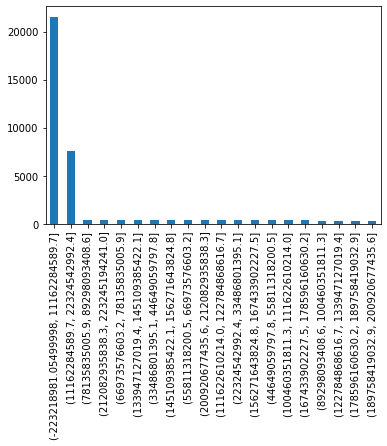

In [35]:
plt.figure()
df['ip_add'].value_counts(bins=20).plot.bar()
plt.show()

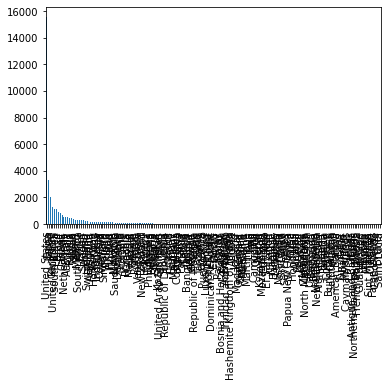

In [21]:
plt.figure()
df['geo_loc'].value_counts().plot.bar()
plt.show()

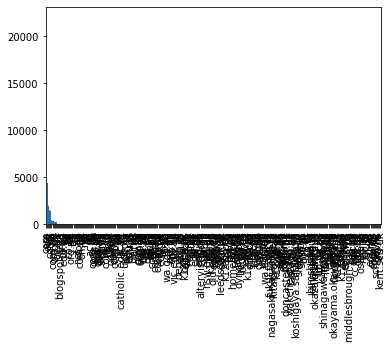

In [22]:
plt.figure()
df['tld'].value_counts().plot.bar()
plt.show()

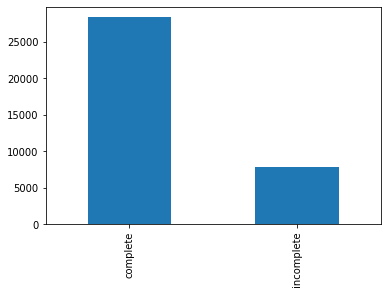

In [23]:
plt.figure()
df['who_is'].value_counts().plot.bar()
plt.show()

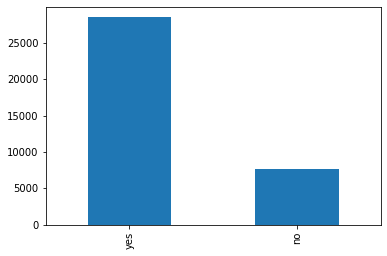

In [24]:
plt.figure()
df['https'].value_counts().plot.bar()
plt.show()

In [31]:
# plt.figure()
# df['content'].value_counts().plot.bar()
# plt.show()